Labor 4: Spektrogramm, AKF, Periodogramm, H(z)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from scipy.signal import find_peaks, correlate, periodogram, welch

a: Berechnen und plotten Sie das Spektrogramm eines von Ihnen erstellten Audiotextes ("Dies
ist eine Suchmaschine."). Erstellen Sie ein Schmallband- und Breitband-Spektrogramm.
Wann erfolgt ein sichtbarer Übergang zwischen dem Schmallband- und dem
Breitbandspektrum? Erklären Sie das Verhalten? Extrahieren Sie anschließend Formanten
aus ihrem Spektrum und versuchen Sie diese einzelnen Vokalen zuzuordnen. Welchen
Zeitbereichen können Sie Konsonanten zuordnen? Warum ist diese Zuordnung eindeutig?

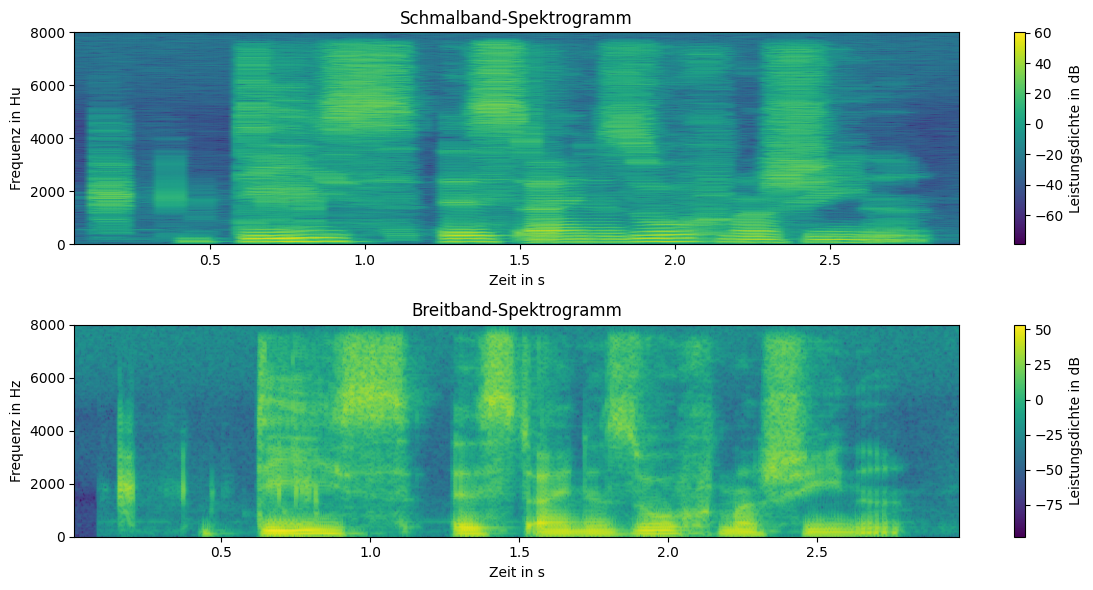

In [2]:
sample_rate, audio_data = wavfile.read("suchmaschine.wav")

nperseg_schmal = 2048
noverlap_schmal = 1800
f_schmal, t_schmal, Sxx_schmal = signal.spectrogram(audio_data, fs=sample_rate, nperseg=nperseg_schmal, noverlap=noverlap_schmal)

nperseg_breit = 256
noverlap_breit = 200
f_breit, t_breit, Sxx_breit = signal.spectrogram(audio_data, fs=sample_rate, nperseg=nperseg_breit, noverlap=noverlap_breit)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.pcolormesh(t_schmal, f_schmal, 10 * np.log10(Sxx_schmal), shading='gouraud')
plt.ylabel('Frequenz in Hu')
plt.xlabel('Zeit in s')
plt.title('Schmalband-Spektrogramm')
plt.colorbar(label='Leistungsdichte in dB')
plt.ylim([0, 8000])

plt.subplot(2, 1, 2)
plt.pcolormesh(t_breit, f_breit, 10 * np.log10(Sxx_breit), shading='gouraud')
plt.ylabel('Frequenz in Hz')
plt.xlabel('Zeit in s')
plt.title('Breitband-Spektrogramm')
plt.colorbar(label='Leistungsdichte in dB')
plt.ylim([0, 8000])

plt.tight_layout()
plt.show()

Berrechnung und Plattung von Schmalband- und Breitband-Spektrogramme eines Audiotextes aus einer WAV-Datei, um die Leistungsdichte über Zeit und Frequenz darzustellen. Dabei werden unterschiedliche Fenstergrößen und Überlappungen verwendet, um die zeitliche und frequenzielle Auflösung zu variieren.

Der sichtbare Übergang zwischen dem Schmalband- und dem Breitbandspektrum erfolgt durch die unterschiedlichen Fenstergrößen: Schmalband zeigt feine Frequenzdetails, während Breitband schnelle zeitliche Änderungen darstellt. Dies liegt an dem Kompromiss zwischen zeitlicher und frequenzieller Auflösung.

b: Extrahieren Sie aus ihrer Sprachnachricht jeweils einen Vokal und einen Konsonaten und
berechnen die zugehörige Autokorrelationsfunktion. Erklären Sie die Unterschiede zwischen
der AKF eines Konsonaten und der AKF eines Vokals

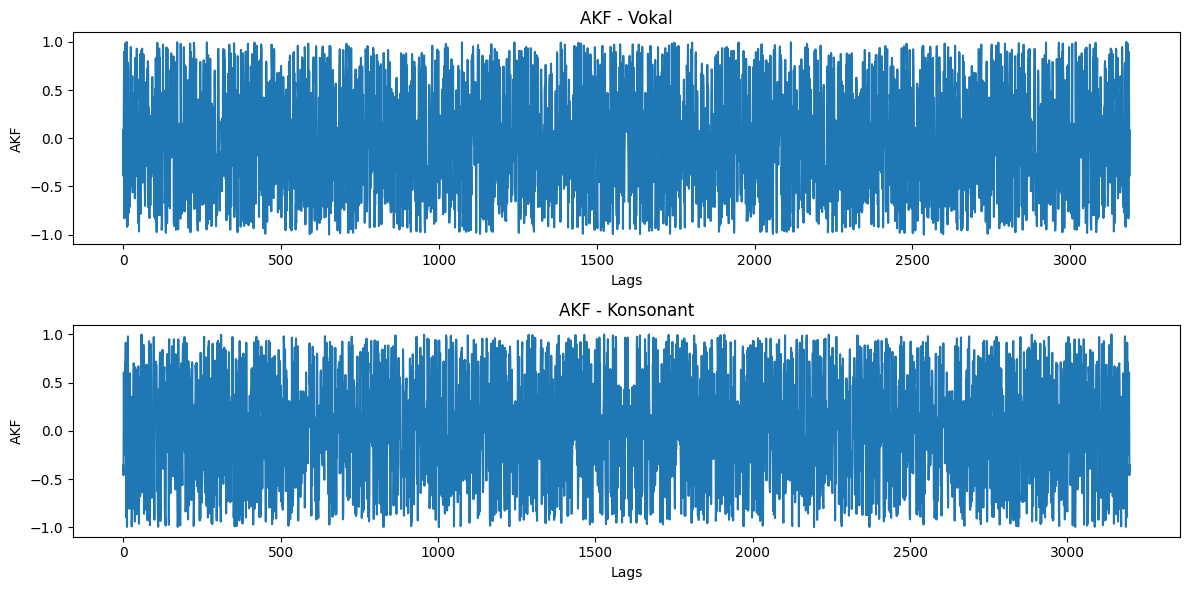

In [3]:
sample_rate_vokal, vokal_data = wavfile.read("vokal.wav")
sample_rate_konsonant, konsonant_data = wavfile.read("konsonant.wav")

akf_vokal = correlate(vokal_data, vokal_data, mode='full')
akf_vokal = akf_vokal / np.max(akf_vokal)

akf_konsonant = correlate(konsonant_data, konsonant_data, mode='full')
akf_konsonant = akf_konsonant / np.max(akf_konsonant)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(akf_vokal)
plt.title('AKF - Vokal')
plt.xlabel('Lags')
plt.ylabel('AKF')

plt.subplot(2, 1, 2)
plt.plot(akf_konsonant)
plt.title('AKF - Konsonant')
plt.xlabel('Lags')
plt.ylabel('AKF')

plt.tight_layout()
plt.show()

Hier werden die Audiodaten von zwei WAV-Dateien (Vokal und Konsonant) eingelesen, ihre AKF berechnet, normiert und anschließend in zwei Diagrammen visualisiert, um die Unterschiede in den akustischen Eigenschaften darzustellen. Vokale zeigen in ihrer AKF eine regelmäßige, periodische Struktur aufgrund gleichmäßiger Stimmbandschwingungen. Konsonanten hingegen zeigen eine unregelmäßige Struktur, da sie durch Turbulenzen und abrupte Luftstromänderungen entstehen.

c: Bestimmen und plotten Sie das Periodogramm und das Welch-Leistungsspektrum eines
Konsonanten. Vergleichen Sie die beiden Diagramme.

C:\Users\dzaen\AppData\Local\Temp\ipykernel_3352\2934251289.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f_periodogram, 10 * np.log10(Pxx_periodogram))


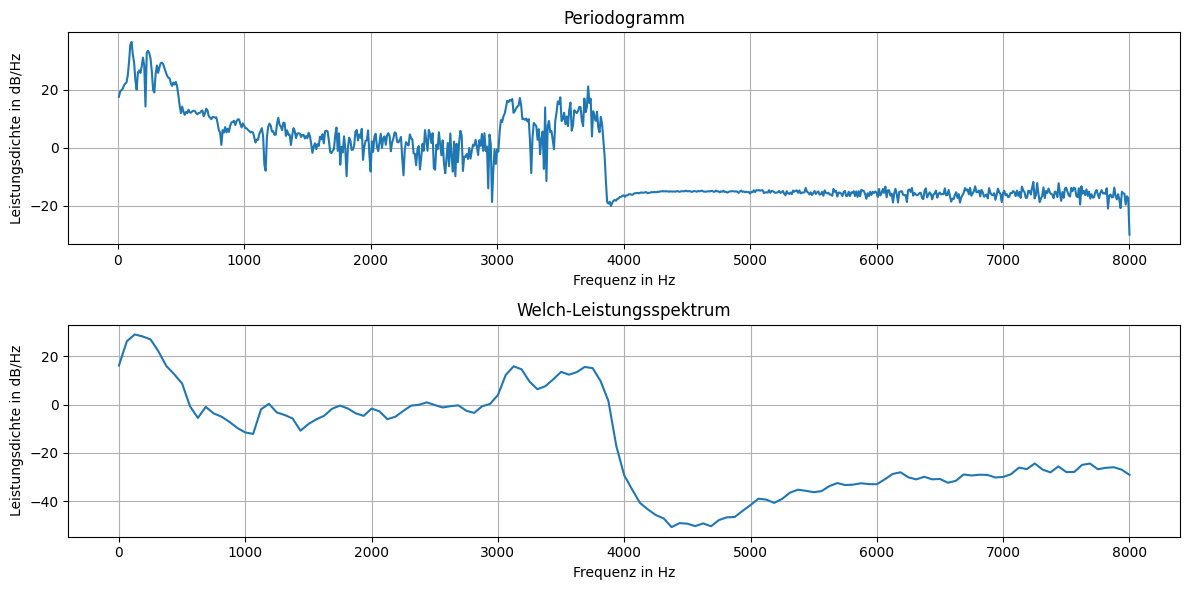

In [4]:
f_periodogram, Pxx_periodogram = periodogram(konsonant_data, sample_rate_konsonant)

f_welch, Pxx_welch = welch(konsonant_data, sample_rate_konsonant, nperseg=256, noverlap=128)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f_periodogram, 10 * np.log10(Pxx_periodogram))
plt.title('Periodogramm')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Leistungsdichte in dB/Hz')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(f_welch, 10 * np.log10(Pxx_welch))
plt.title('Welch-Leistungsspektrum')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Leistungsdichte in dB/Hz')
plt.grid()

plt.tight_layout()
plt.show()


In diesem Code werden das Periodogramm und das Welch-Leistungsspektrum des Konsonant-Audiosignals berechnet und in zwei Diagrammen visualisiert, um die Leistungsdichte über verschiedene Frequenzen hinweg darzustellen. Das Periodogramm zeigt detaillierte Frequenzkomponenten eines Konsonanten, jedoch mit hoher Varianz und einem rauschigen Erscheinungsbild, während das Welch-Leistungsspektrum eine glattere und stabilere Schätzung der Leistungsdichte liefert, jedoch mit geringerer Frequenzauflösung.

d: Modellieren Sie nun weißes Gauß'sches Rauschen mit den Parametern 𝜇 = 0, 𝜎 = 1 .
Plotten Sie dazu ein Oszillogramm der Länge von 1s mit einer Abtastrate f$ = 8000Hz.

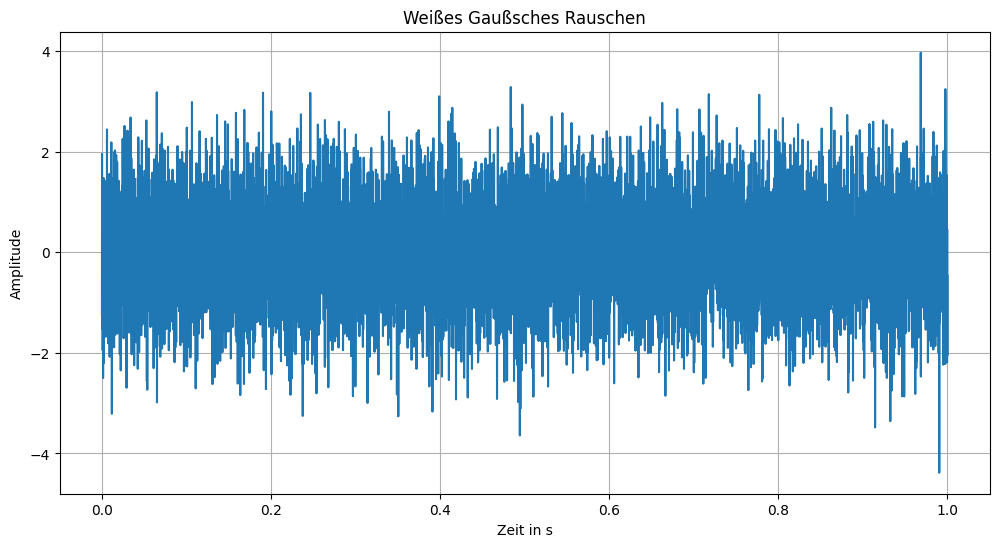

In [5]:
fs = 8000
mu = 0
sigma = 1
duration = 1

num_samples = int(fs * duration)
white_noise = np.random.normal(mu, sigma, num_samples)
time = np.linspace(0, duration, num_samples, endpoint=False)

plt.figure(figsize=(12, 6))
plt.plot(time, white_noise)
plt.title("Weißes Gaußsches Rauschen")
plt.xlabel("Zeit in s")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Es wird ein 1-sekündiges weißes Gauß'sches Rauschen mit einer Abtastrate von 8000 Hz erzeugt und dessen Amplitude über die Zeit in einem Diagramm visualisiert.

e: Berechnen und plotten sie die AKF des soeben modellierten Rauschsignals. Berechnen Sie
zusätzlich aus der AKF die spektrale Leistungsdichte. Vergleichen und diskutieren Sie die
Diagramme

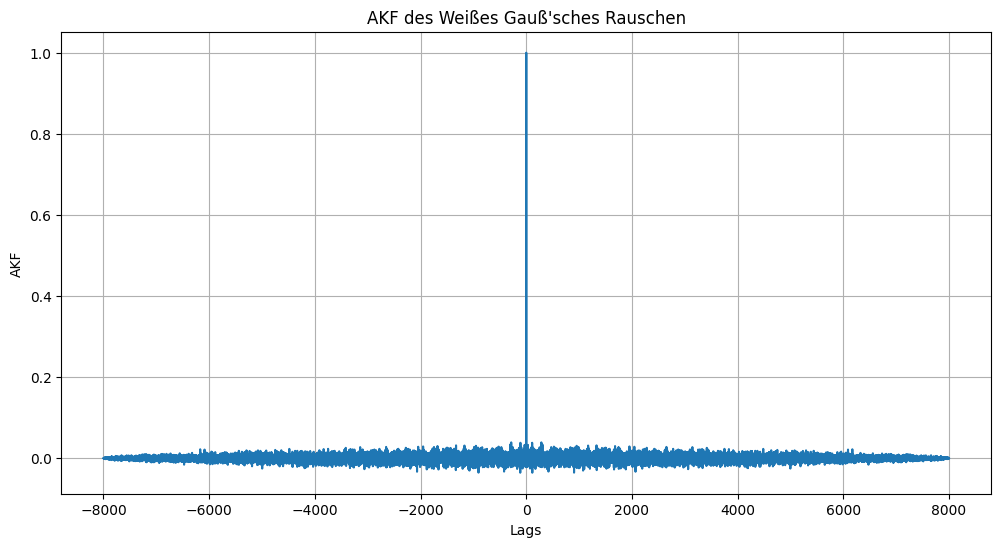

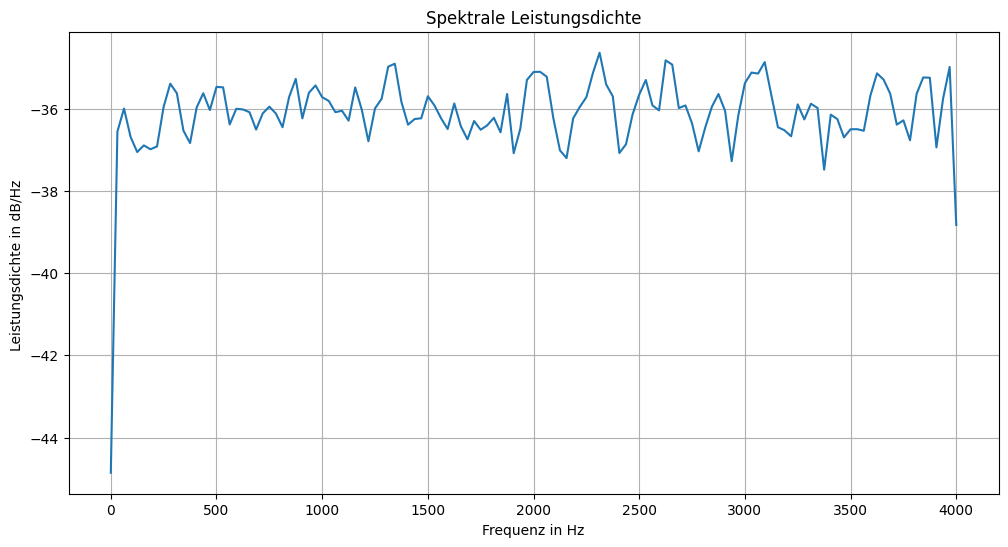

In [6]:
akf = correlate(white_noise, white_noise, mode='full')
lags = np.arange(-num_samples + 1, num_samples)
akf = akf / np.max(akf)

plt.figure(figsize=(12, 6))
plt.plot(lags, akf)
plt.title("AKF des Weißes Gauß'sches Rauschen")
plt.xlabel("Lags")
plt.ylabel("AKF")
plt.grid()
plt.show()

f_welch, Pxx_welch = welch(white_noise, fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(12, 6))
plt.plot(f_welch, 10 * np.log10(Pxx_welch))
plt.title("Spektrale Leistungsdichte")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Leistungsdichte in dB/Hz ")
plt.grid()
plt.show()


Die AKF und das Welch-Leistungsspektrum für das weißes Gauß'sches Rauschen wird berechnet und visualisiert. Die AKF zeigt, dass weißes Rauschen nur bei Lag = 0 korreliert und bei allen anderen Lags nahezu null ist, während die spektrale Leistungsdichte gleichmäßig über alle Frequenzen verteilt ist, was bestätigt, dass das weiße Rauschen alle Frequenzen gleichmäßig abdeckt.

f: Bestimmen und plotten Sie jetzt das Welch-Leistungsspektrum des weißen Gauß'schen
Rauschen und vergleichen Sie es mit der in vorheriger Teilaufgabe bestimmten
Leistungsspektrum.

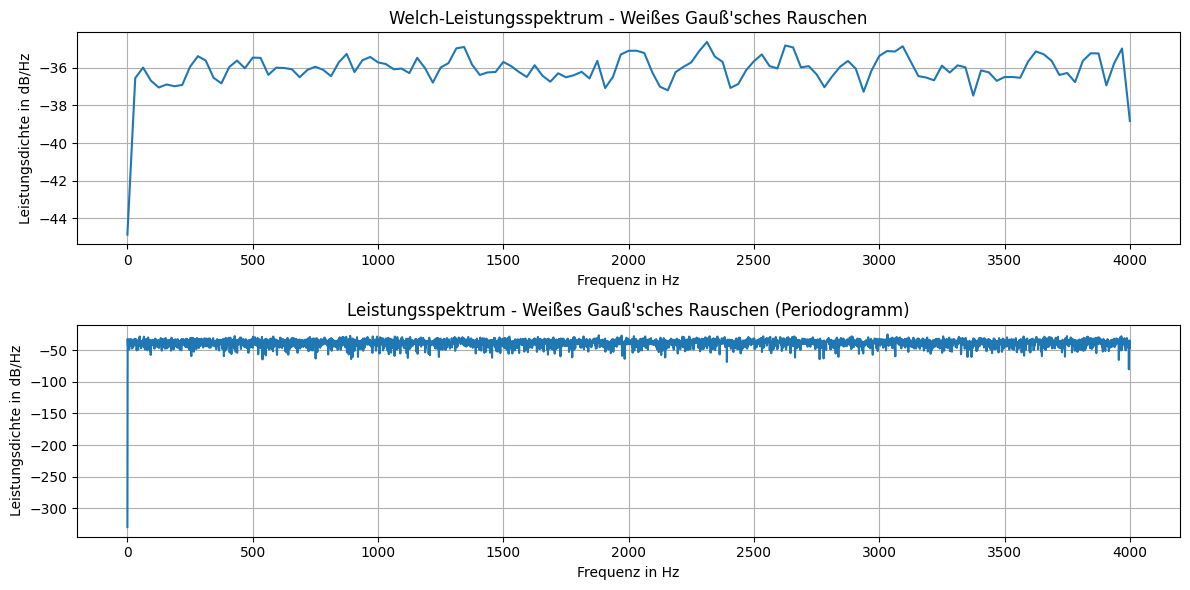

In [7]:
f_periodogram, Pxx_periodogram = periodogram(white_noise, fs=fs)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f_welch, 10 * np.log10(Pxx_welch))
plt.title('Welch-Leistungsspektrum - Weißes Gauß\'sches Rauschen')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Leistungsdichte in dB/Hz')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(f_periodogram, 10 * np.log10(Pxx_periodogram))
plt.title('Leistungsspektrum - Weißes Gauß\'sches Rauschen (Periodogramm)')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Leistungsdichte in dB/Hz')
plt.grid()

plt.tight_layout()
plt.show()


In diesem Code werden das Welch-Leistungsspektrum und das Periodogramm für weißes Gauß'sches Rauschen berechnet und in zwei Diagrammen visualisiert, um die Leistungsdichte über verschiedene Frequenzen hinweg darzustellen. Das Welch-Leistungsspektrum ist glatter und stabiler, da es überlappende Segmente verwendet und die Varianz reduziert. Im Gegensatz dazu ist das Periodogramm detaillierter, aber rauschiger, da es die spektrale Leistungsdichte direkt aus dem gesamten Signal berechnet.